In [95]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
from utils import *
from filters import *

In [96]:
delta1 = 0.15
delta2 = 0.15
fp1,fp2,fs1,fs2,f_samp = 113000,198000,118000,193000,600000

[wp1,wp2,ws1,ws2] = normalize(f_samp,[fp1,fp2,fs1,fs2])

[Op1,Op2,Os1,Os2] = to_analog([wp1,wp2,ws1,ws2])

[OLp1,OLp2,OLs1,OLs2],B,Omega_o,tr_fn = sb_to_lp(Op1,Op2,Os1,Os2)

In [97]:
omega_p,omega_s = max(abs(OLp1),abs(OLp2)),min(abs(OLs1),abs(OLs2))
cheby_lp,N,eps,poles = Chebyshev(delta1,delta2,omega_p,omega_s)

In [98]:
ang_freq = np.linspace(0,1.5*omega_s,1401)
response = np.vectorize(cheby_lp)(ang_freq*(1j))

mag_resp = np.absolute(response)
phase = np.angle(response)

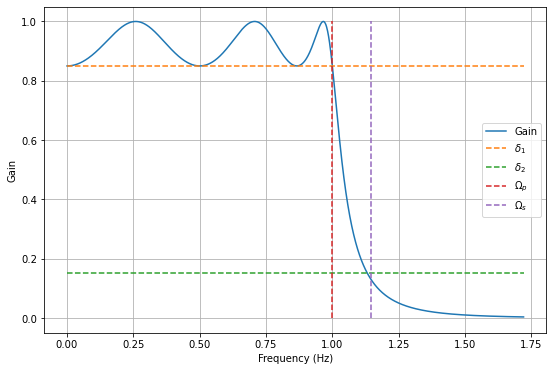

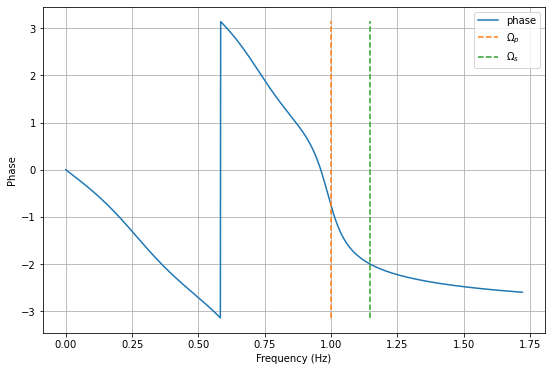

In [99]:
plt.plot(ang_freq,mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([omega_p,omega_p], [0,1],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [0,1],'--', label='$\Omega_s$')
# plt.plot([omega_c,omega_c], [0,1],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_sL.pdf')

plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([omega_p,omega_p], [-pi,pi],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [-pi,pi],'--', label='$\Omega_s$')
# plt.plot([omega_c,omega_c], [-pi,pi],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_sL.pdf')
plt.show()

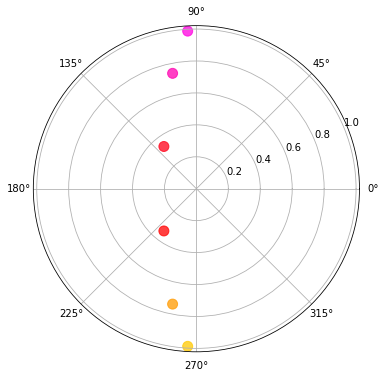

In [100]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles), np.abs(poles), c=np.angle(poles), s=100, cmap='hsv', alpha=0.75)
plt.savefig('Poles_sL.pdf')


In [101]:
N,eps

(6, 0.6197443384031024)

In [102]:
sl = symbols('sl') # creating the symbolic sL
Tr_fn_lp = cheby_lp(sl) # passing symbol to lp transfer function 
Tr_fn_lp

(0.0504240185243515 + 5.97178556605016e-17*I)/((sl + 0.0545827526924831 + 0.987172059934913*I)*(sl + 0.0545827526924832 - 0.987172059934913*I)*(sl + 0.149122853572831 + 0.722660103684785*I)*(sl + 0.149122853572831 - 0.722660103684785*I)*(sl + 0.203705606265314 + 0.264511956250128*I)*(sl + 0.203705606265314 - 0.264511956250127*I))

In [103]:
Tr_fn_lp_print = round_expr(Tr_fn_lp,3) # for printing purposes, we round coefficients
print(latex(Tr_fn_lp_print))
print("===================================")
print(latex(round_expr(expand(Tr_fn_lp,sl),3)))

\frac{0.05}{\left(sl + 0.055 - 0.987 i\right) \left(sl + 0.055 + 0.987 i\right) \left(sl + 0.149 - 0.723 i\right) \left(sl + 0.149 + 0.723 i\right) \left(sl + 0.204 - 0.265 i\right) \left(sl + 0.204 + 0.265 i\right)}
\frac{0.05}{sl^{6} + 0.815 sl^{5} + 1.832 sl^{4} + 1.03 sl^{3} + 0.848 sl^{2} + 0.256 sl + 0.059}


In [104]:
s = symbols('s')
freq_trfn = tr_fn(s) # S-transformation we obtained from bp_to_lp
Tr_fn_bp = Tr_fn_lp.subs(sl,freq_trfn) # substituting the frequency transform here
Tr_fn_bp

(0.0504240185243515 + 5.97178556605016e-17*I)/((1.01893554284742*s/(s**2 + 1.1362427902402) + 0.0545827526924831 + 0.987172059934913*I)*(1.01893554284742*s/(s**2 + 1.1362427902402) + 0.0545827526924832 - 0.987172059934913*I)*(1.01893554284742*s/(s**2 + 1.1362427902402) + 0.149122853572831 + 0.722660103684785*I)*(1.01893554284742*s/(s**2 + 1.1362427902402) + 0.149122853572831 - 0.722660103684785*I)*(1.01893554284742*s/(s**2 + 1.1362427902402) + 0.203705606265314 + 0.264511956250128*I)*(1.01893554284742*s/(s**2 + 1.1362427902402) + 0.203705606265314 - 0.264511956250127*I))

In [105]:
Tr_fn_bp = simplify(Tr_fn_bp)
Tr_fn_bp

(0.108508634144178 + 1.28508261367761e-16*I)*(0.88009359319112*s**2 + 1)**6/((1.01893554284742*s + (0.0545827526924831 + 0.987172059934913*I)*(s**2 + 1.1362427902402))*(1.01893554284742*s + (0.0545827526924832 - 0.987172059934913*I)*(s**2 + 1.1362427902402))*(1.01893554284742*s + (0.149122853572831 + 0.722660103684785*I)*(s**2 + 1.1362427902402))*(1.01893554284742*s + (0.149122853572831 - 0.722660103684785*I)*(s**2 + 1.1362427902402))*(1.01893554284742*s + (0.203705606265314 + 0.264511956250128*I)*(s**2 + 1.1362427902402))*(1.01893554284742*s + (0.203705606265314 - 0.264511956250127*I)*(s**2 + 1.1362427902402)))

In [106]:
print(latex(round_expr(expand(Tr_fn_bp,s),3)))

\frac{0.05 s^{12}}{0.059 s^{12} + 0.261 s^{11} + 1.285 s^{10} + 2.571 s^{9} + 7.127 s^{8} + 7.975 s^{7} + 14.171 s^{6} + 9.062 s^{5} + 9.202 s^{4} + 3.771 s^{3} + 2.142 s^{2} + 0.494 s + 0.128} + \frac{0.344 s^{10}}{0.059 s^{12} + 0.261 s^{11} + 1.285 s^{10} + 2.571 s^{9} + 7.127 s^{8} + 7.975 s^{7} + 14.171 s^{6} + 9.062 s^{5} + 9.202 s^{4} + 3.771 s^{3} + 2.142 s^{2} + 0.494 s + 0.128} + \frac{0.976 s^{8}}{0.059 s^{12} + 0.261 s^{11} + 1.285 s^{10} + 2.571 s^{9} + 7.127 s^{8} + 7.975 s^{7} + 14.171 s^{6} + 9.062 s^{5} + 9.202 s^{4} + 3.771 s^{3} + 2.142 s^{2} + 0.494 s + 0.128} + \frac{1.479 s^{6}}{0.059 s^{12} + 0.261 s^{11} + 1.285 s^{10} + 2.571 s^{9} + 7.127 s^{8} + 7.975 s^{7} + 14.171 s^{6} + 9.062 s^{5} + 9.202 s^{4} + 3.771 s^{3} + 2.142 s^{2} + 0.494 s + 0.128} + \frac{1.261 s^{4}}{0.059 s^{12} + 0.261 s^{11} + 1.285 s^{10} + 2.571 s^{9} + 7.127 s^{8} + 7.975 s^{7} + 14.171 s^{6} + 9.062 s^{5} + 9.202 s^{4} + 3.771 s^{3} + 2.142 s^{2} + 0.494 s + 0.128} + \frac{0.573 s^{2}}{

In [107]:

butter_bp = lambdify(s, Tr_fn_bp,'numpy') # returns a numpy-ready function

ang_freq = np.linspace(0,2,1401)

bp_response = butter_bp(ang_freq*(1j))
bp_mag_resp = np.absolute(bp_response)
bp_phase = np.angle(bp_response)

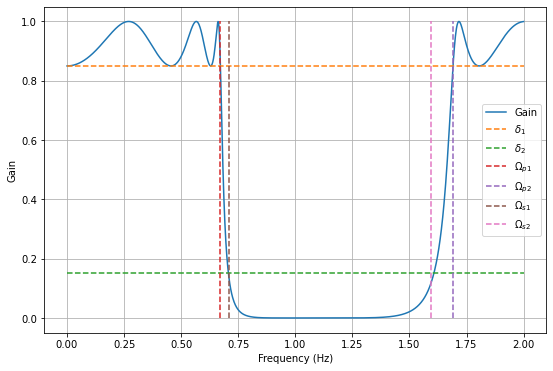

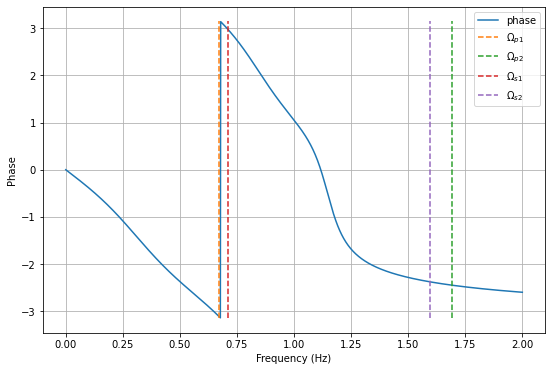

In [108]:
plt.plot(ang_freq,bp_mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([Op1,Op1], [0,1],'--', label='$\Omega_{p1}$')
plt.plot([Op2,Op2], [0,1],'--', label='$\Omega_{p2}$')
plt.plot([Os1,Os1], [0,1],'--', label='$\Omega_{s1}$')
plt.plot([Os2,Os2], [0,1],'--', label='$\Omega_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_s.pdf')

plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([Op1,Op1], [-pi,pi],'--', label='$\Omega_{p1}$')
plt.plot([Op2,Op2], [-pi,pi],'--', label='$\Omega_{p2}$')
plt.plot([Os1,Os1], [-pi,pi],'--', label='$\Omega_{s1}$')
plt.plot([Os2,Os2], [-pi,pi],'--', label='$\Omega_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_s.pdf')
plt.show()

In [109]:
poles_bp = solve(1/Tr_fn_bp) # Finding Poles of System in Bandpass domain
poles_bp = np.fromiter(poles_bp,dtype=complex)

In [110]:
poles_bp

array([-1.67570545-2.72080567j, -1.67570545+2.72080567j,
       -0.21460637-1.93303724j, -0.21460637+1.93303724j,
       -0.18647054+0.30276807j, -0.18647054-0.30276807j,
       -0.06446339-0.58064507j, -0.06446339+0.58064507j,
       -0.04081793-1.69786306j, -0.04081793+1.69786306j,
       -0.01607925+0.66883278j, -0.01607925-0.66883278j])

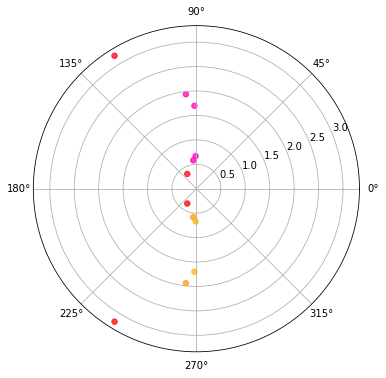

In [111]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles_bp), np.abs(poles_bp), c=np.angle(poles_bp), s=30, cmap='hsv', alpha=0.75)
plt.savefig('Poles_s.pdf')


In [112]:
z = symbols('z') # Symbol for Z-domain
bilenear_trans = (z-1)/(z+1) # to transform s to z

bilenear_trans

(z - 1)/(z + 1)

In [113]:
tr_fn_z = Tr_fn_bp.subs(s,bilenear_trans) # Substitute s by bilinear transform
tr_fn_z

(0.108508634144178 + 1.28508261367761e-16*I)*(0.88009359319112*(z - 1)**2/(z + 1)**2 + 1)**6/((1.01893554284742*(z - 1)/(z + 1) + (0.0545827526924831 + 0.987172059934913*I)*((z - 1)**2/(z + 1)**2 + 1.1362427902402))*(1.01893554284742*(z - 1)/(z + 1) + (0.0545827526924832 - 0.987172059934913*I)*((z - 1)**2/(z + 1)**2 + 1.1362427902402))*(1.01893554284742*(z - 1)/(z + 1) + (0.149122853572831 + 0.722660103684785*I)*((z - 1)**2/(z + 1)**2 + 1.1362427902402))*(1.01893554284742*(z - 1)/(z + 1) + (0.149122853572831 - 0.722660103684785*I)*((z - 1)**2/(z + 1)**2 + 1.1362427902402))*(1.01893554284742*(z - 1)/(z + 1) + (0.203705606265314 + 0.264511956250128*I)*((z - 1)**2/(z + 1)**2 + 1.1362427902402))*(1.01893554284742*(z - 1)/(z + 1) + (0.203705606265314 - 0.264511956250127*I)*((z - 1)**2/(z + 1)**2 + 1.1362427902402)))

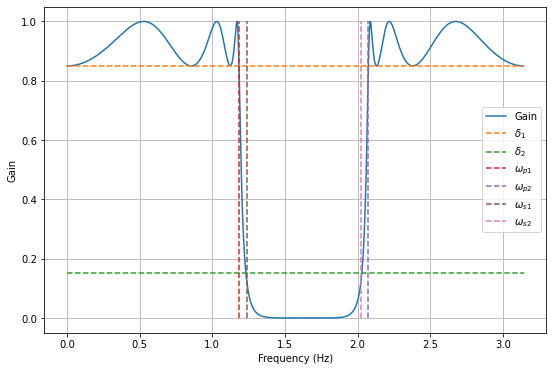

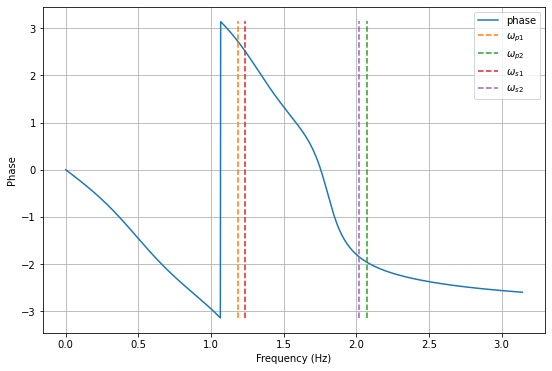

In [114]:

butter_z = lambdify(z, tr_fn_z,'numpy') # returns a numpy-ready function

ang_freq = np.linspace(0,np.pi,1401)

z_response = butter_z(np.exp(ang_freq*(1j)))
z_mag_resp = np.absolute(z_response)
z_phase = np.angle(z_response)

plt.plot(ang_freq,z_mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([wp1,wp1], [0,1],'--', label='$\omega_{p1}$')
plt.plot([wp2,wp2], [0,1],'--', label='$\omega_{p2}$')
plt.plot([ws1,ws1], [0,1],'--', label='$\omega_{s1}$')
plt.plot([ws2,ws2], [0,1],'--', label='$\omega_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_z.pdf')

plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([wp1,wp1], [-pi,pi],'--', label='$\omega_{p1}$')
plt.plot([wp2,wp2], [-pi,pi],'--', label='$\omega_{p2}$')
plt.plot([ws1,ws1], [-pi,pi],'--', label='$\omega_{s1}$')
plt.plot([ws2,ws2], [-pi,pi],'--', label='$\omega_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_z.pdf')
plt.show()


In [115]:
poles_Z = solve(1/tr_fn_z) # Solve for poles of the system
poles_Z = np.fromiter(poles_Z,dtype=complex)
Zeros_Z = solve(tr_fn_z) # Solve for Zeros of the system
Zeros_Z = np.fromiter(Zeros_Z,dtype=complex)

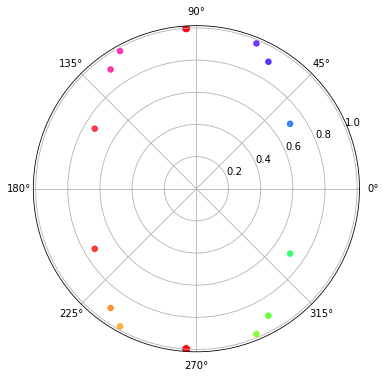

In [116]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles_Z), np.abs(poles_Z), c=np.angle(poles_Z), s=30, cmap='hsv', alpha=0.75)
c = ax.scatter(np.angle(Zeros_Z), np.abs(Zeros_Z), c=np.angle(Zeros_Z), s=50, cmap='hsv', alpha=1)
plt.savefig('Poles_Zeros_Z.pdf')

In [117]:
print(latex(round_expr(simplify(tr_fn_z).subs(I,0),3)))

0.109 \left(0.88 \left(z - 1\right)^{2} + \left(z + 1\right)^{2}\right)^{6} \cdot \frac{0.9631}{\left(0.05397 \left(z - 1\right)^{2} + \left(z - 1\right) \left(z + 1\right) + 0.06086 \left(z + 1\right)^{2}\right)^{2}} \cdot \frac{0.9631}{\left(0.1462 \left(z - 1\right)^{2} + \left(z - 1\right) \left(z + 1\right) + 0.1659 \left(z + 1\right)^{2}\right)^{2}} \cdot \frac{0.9631}{\left(0.2002 \left(z - 1\right)^{2} + \left(z - 1\right) \left(z + 1\right) + 0.2267 \left(z + 1\right)^{2}\right)^{2}}


In [118]:
print(latex(round_expr(factor(tr_fn_z),3)))

\frac{4.792 \left(1.0 z^{2} + 0.128 z + 1.0\right)^{6}}{\left(z^{2} \cdot \left(1.136 - 2.109 i\right) + z \left(0.015 - 0.269 i\right) - 0.902 - 2.109 i\right) \left(z^{2} \cdot \left(1.136 + 2.109 i\right) + z \left(0.015 + 0.269 i\right) - 0.902 + 2.109 i\right) \left(z^{2} \cdot \left(1.337 - 1.544 i\right) + z \left(0.041 - 0.197 i\right) - 0.7 - 1.544 i\right) \left(z^{2} \cdot \left(1.337 + 1.544 i\right) + z \left(0.041 + 0.197 i\right) - 0.7 + 1.544 i\right) \left(z^{2} \cdot \left(1.454 - 0.565 i\right) + z \left(0.056 - 0.072 i\right) - 0.584 - 0.565 i\right) \left(z^{2} \cdot \left(1.454 + 0.565 i\right) + z \left(0.056 + 0.072 i\right) - 0.584 + 0.565 i\right)}
